# 可視化(part 1)

Pythonでは、最も広く利用されている```matplotlib```をはじめ、```Seaborn```、```plotly```など可視化のための様々なライブラリが用意されています。

## matplotlib

```matplotlib```は、Pythonにおけるデータ可視化の定番ライブラリであり、幅広い種類のグラフを作成することができます。また、細かいカスタマイズが可能で、高度な可視化表現にも対応できます。
実に、```matplotlib```は```Seaborn```や```plotly```など、多くの可視化ライブラリの基盤にもなっていまあすので、これらのラッパーを使用した場合でも、最終的な出力を調整するためには、```matplotlib```の構文を熟知しておく必要がしばしばあります。

In [1]:
import matplotlib.pyplot as plt

### 基本設定

#### スタイルの設定

```plt.style.use```命令を使用して、図のスタイルを適切に選択します。

In [2]:
#plt.style.use('classic')
import scienceplots
plt.style.use(['science','no-latex'])

```{margin}
[Science Plots](https://github.com/garrettj403/SciencePlots)は、簡易的に論文用の「良い感じの図」を作成してくれる拡張ライブラリです。
```

#### フォントの設定
```matplotlib```で図のフォントを指定することができます。特に、matplotlib をデフォルトのまま使用すると日本語のテキストは文字化けしてしまいますので、フォント設定を変更することで表示させることが必要されます。

In [3]:
from matplotlib import font_manager

# Path to your TTF file
ttf_path = './Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf'
# Register the font
font_manager.fontManager.addfont(ttf_path)
custom_font = font_manager.FontProperties(fname=ttf_path)

# Set the custom font as default
plt.rcParams['font.family'] = custom_font.get_name()
plt.rcParams['font.family'] = 'Hiragino Sans'


```{margin}
[japanize_matplotlib](https://pypi.org/project/japanize-matplotlib/)でmatplotlibを日本語表示に対応させることができます。
```

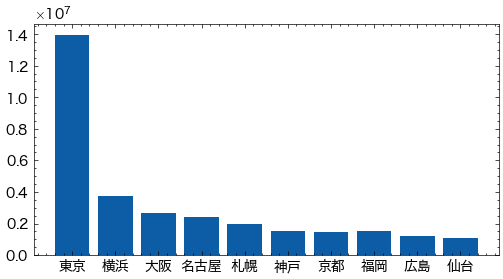

In [4]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
plt.figure(figsize=(6,3))
plt.bar(city,population)
plt.show()

### 基本的な描画方法

可視化を一番手軽に行うために、```matplotlib```ではデータを渡すだけで描画してくれる関数が多数用意されています。

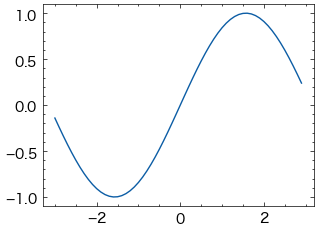

In [5]:
import numpy as np
x = np.arange(-3, 3, 0.1)
y = np.sin(x)
# 折れ線グラフ
plt.plot(x, y)

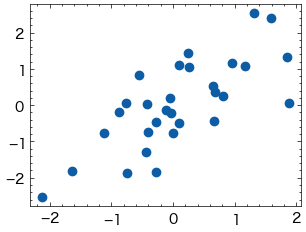

In [6]:
x = np.random.randn(30)
y = np.sin(x) + np.random.randn(30)
plt.plot(x, y, "o")  # "o"は小さい円(circle marker)

(array([  3.,   5.,  33., 109., 219., 258., 224., 112.,  34.,   3.]),
 array([-3.83321089, -3.13126162, -2.42931236, -1.7273631 , -1.02541384,
        -0.32346458,  0.37848469,  1.08043395,  1.78238321,  2.48433247,
         3.18628173]),
 <BarContainer object of 10 artists>)

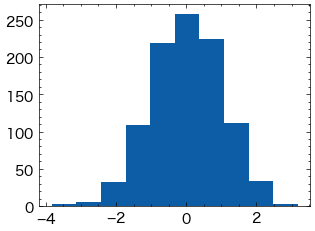

In [7]:
# ヒストグラム
plt.hist(np.random.randn(1000))

<ErrorbarContainer object of 3 artists>

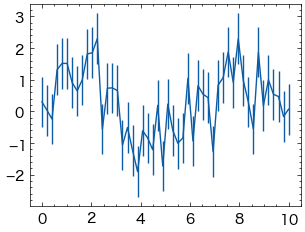

In [8]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x)+dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy)

### オブジェクト指向なプロット

ここまでは```matplotlib.pyplot```モジュールの関数を利用することでグラフを描画する方法を紹介しましたが、この方法では、描画している図が暗に行われているため、細かい設定を行うことが難しいです。

そこで、より明示的な方法で描画ができるオブジェクト指向なインターフェースを使った方法を解説します。

「オブジェクト指向インターフェース」は```Figure```や```Axes```などのオブジェクトを用いてグラフを作成する方法です。

- ```Figure```オブジェクト
    - グラフや軸を描くための土台となるオブジェクト：サイズやレイアウトなどグラフ全体に関する設定を行い、軸、グラフィックス、テキスト、ラベルなど、全ての描画要素を含むコンテナと考えることができます。
- ```Axex```オブジェクト
    - ```Axex```オブジェクトはFigureオブジェクトの子として作成され、Figure内の1つのプロットエリアを表します。これが実際にデータをプロットする領域です。

![](./Figure/matplotlib_figure_parts.png)


#### グラフ作成の主な流れ

オブジェクト指向インターフェースにおけるグラフ作成の流れは以下の通りです。

- `plt.figure()`でFigureオブジェクト(土台)を作成
- `plt.add_subplot()`でAxesオブジェクトを作成
- `Axes.plot()`などのメソッドでグラフを作成
- `Axes.set_title()`などのメソッドでグラフのスタイルを調整
- `plt.show()`でグラフを表示


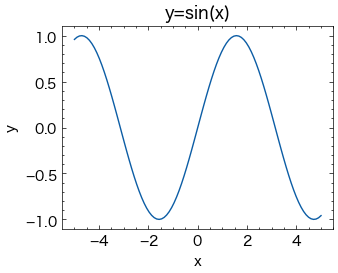

In [9]:
# プロットに対して、図(figure)と座標軸(axex)の作成を最初に行います。
fig = plt.figure()
ax = fig.add_subplot()

#プロットするデータ
x = np.linspace(-5, 5, 100)
y = np.sin(x)

#プロット
ax.plot(x, y)

#グラフのスタイルの微調整を行います。
ax.set_title('y=sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

同じAxesオブジェクトからグラフを作成するメソッドを複数回呼び出すと、1つのAxesに複数のグラフを重ねて描くことができます。

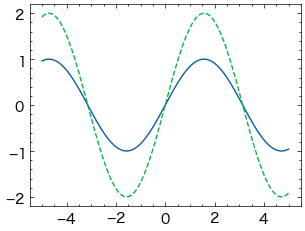

In [10]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot()

#2つのグラフを同じAxesに作成
ax.plot(x, y)
ax.plot(x, 2*y, '--')

plt.show()

#### 複数サブプロット

##### サブプロットの単純なグリッド

列または行で整列したサブプロットの集合で結果を可視化することは非常に一般です。

オブジェクト指向インターフェースでは、こうした複数のプロットを一つの図にまとめる場合には特に有用です。


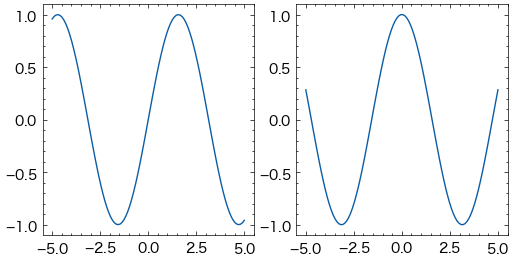

In [11]:
# Figureオブジェクトを作成
fig = plt.figure(figsize=(6, 3))

# FigureにAxesを追加
ax1 = fig.add_subplot(1, 2, 1)  # 1行2列の最初のサブプロット
ax2 = fig.add_subplot(1, 2, 2)  # 1行2列の2番目のサブプロット

# 各Axesにプロットを追加
x = np.linspace(-5, 5, 100)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# 図を表示
plt.show()

```plt.subplots```で、単一のサブプロットを作成するのではなく、一回の呼び出しでサブプロットのグリッドを作成することができます。これにより、複数のプロットを一つの図内で並べて表示することが簡単にできます。

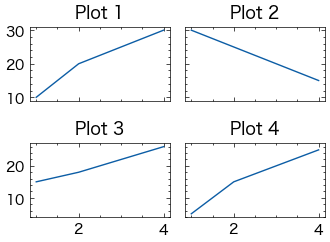

In [12]:
# 2x2のサブプロットグリッドを作成
fig, axs = plt.subplots(2, 2, sharex="col", sharey="row")

# 各サブプロットにデータをプロット
axs[0, 0].plot([1, 2, 3, 4], [10, 20, 25, 30])
axs[0, 0].set_title('Plot 1')

axs[0, 1].plot([1, 2, 3, 4], [30, 25, 20, 15])
axs[0, 1].set_title('Plot 2')

axs[1, 0].plot([1, 2, 3, 4], [15, 18, 22, 26])
axs[1, 0].set_title('Plot 3')

axs[1, 1].plot([1, 2, 3, 4], [5, 15, 20, 25])
axs[1, 1].set_title('Plot 4')

# レイアウトを調整
plt.tight_layout()

# グラフを表示
plt.show()

### プロットの作成

```matplotlib```では、さまざまなカスタマイズや設定を行うことができます。
![](./Figure/anatomy.png)

#### 線グラフ

線の主な書式を以下の表に示します。

|引数|説明|
|---|---|
|linewidth/lw|線の太さ|
|color/c|線の色|
|alpha|色の透明度|
|linestyle|線の種類|

色の変更は、```color```キーワードに色を表す文字列引数を指定します。色の指定方法には様々な方法があります。

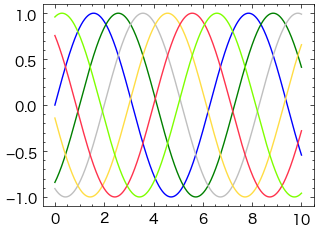

In [13]:
x = np.linspace(0, 10, 1000)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, np.sin(x - 0), color='blue')        # specify color by name
ax.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.75')        # grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#FFDD44')     # hex code (RRGGBB, 00 to FF)
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
ax.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

同様に、```linesyle```キーワードを使用して線のスタイルを調整することもできます。

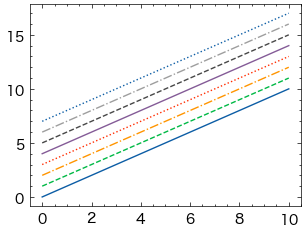

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
ax.plot(x, x + 4, linestyle='-')  # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':');  # dotted

また、線スタイルとカラーコードでまとめて指定することもできます。

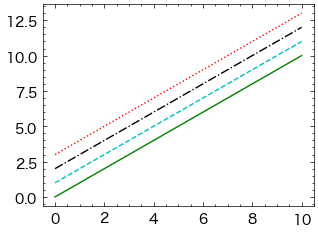

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, x + 0, '-g')   # solid green
ax.plot(x, x + 1, '--c')  # dashed cyan
ax.plot(x, x + 2, '-.k')  # dashdot black
ax.plot(x, x + 3, ':r');  # dotted red

線の色とスタイルに加えて、データポイントにマーカーを追加することもできます。marker引数を使用します。

No handles with labels found to put in legend.


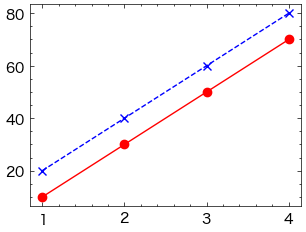

In [16]:
fig, ax = plt.subplots()

# 線の色、スタイル、マーカーを指定
ax.plot([1, 2, 3, 4], [10, 30, 50, 70], color='red', linestyle='-', marker='o')
ax.plot([1, 2, 3, 4], [20, 40, 60, 80], color='blue', linestyle='--', marker='x')

ax.legend()
plt.show()

#### 棒グラフ

棒の色を指定するには、同様に```color```引数を使用します。

<BarContainer object of 10 artists>

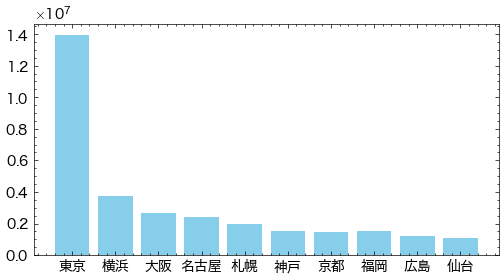

In [17]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue')

棒の幅を指定するには、```width```引数を使用します。



<BarContainer object of 10 artists>

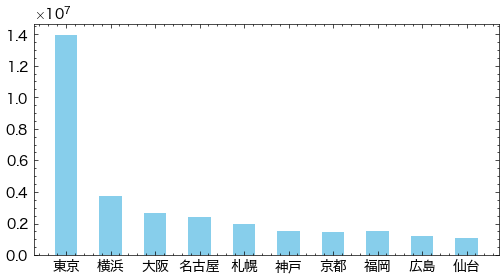

In [18]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.5)

棒に枠線を付ける場合、枠線の色を`edgecolor`, 枠線の太さを`linewidth`で指定します。

<BarContainer object of 10 artists>

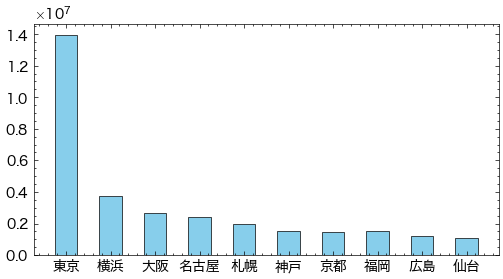

In [19]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.5,edgecolor="black", linewidth=0.5)

横棒グラフを出力するには、ax.barhを使用します。ax.barhの最初の引数が縦軸方向の位置、2番目の引数が棒の長さとなります。

<BarContainer object of 10 artists>

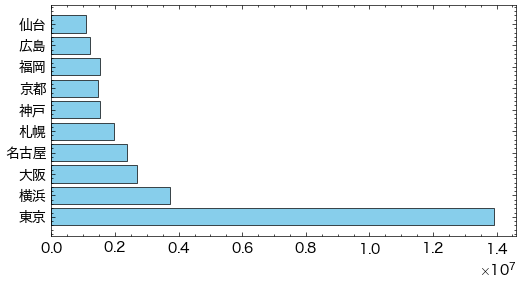

In [20]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(city, population,color='skyblue',edgecolor="black", linewidth=0.5)

棒の位置を調整するために、棒の中心をシフトすることができます。

[Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')]

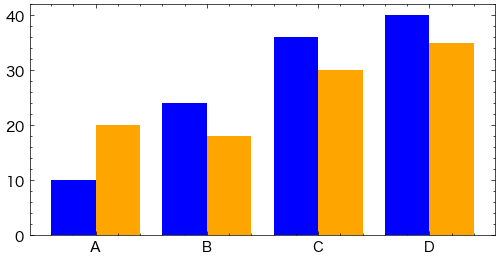

In [21]:
categories = ['A', 'B', 'C', 'D']
x = np.arange(len(categories))
values1 = [10, 24, 36, 40]
values2 = [20, 18, 30, 35]

width = 0.4  # 幅を設定

fig, ax = plt.subplots(figsize=(6, 3))

# 2つのデータセットを並べて表示
ax.bar(x - width/2, values1, width=width, color='blue')
ax.bar(x + width/2, values2, width=width, color='orange')

ax.set_xticks(x)
ax.set_xticklabels(categories)

積み上げ棒グラフを作成する場合、bottomオプションで下になるデータを指定します。

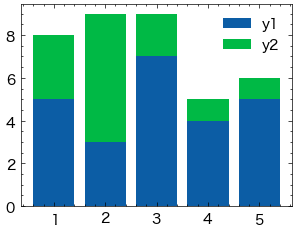

In [22]:
x = np.array([1, 2, 3, 4, 5]) # 横軸の値
y1 = np.array([5, 3, 7, 4, 5]) # 下側のデータ
y2 = np.array([3, 6, 2, 1, 1]) # 上側のデータ

fig, ax = plt.subplots()
ax.bar(x, y1, label="y1")
ax.bar(x, y2, label="y2", bottom=y1)
ax.legend()
plt.show()

#### ヒストグラム

ヒストグラムを出力するには、`ax.hist`を使用します。`ax.hist`の最初の引数に表示するデータを配列で与えます。

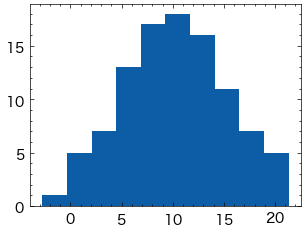

In [23]:
np.random.seed(seed=0)
x = np.random.normal(10, 5, 100) # 平均10, 標準偏差5の正規分布で100点のデータを生成

fig, ax = plt.subplots()
ax.hist(x)
plt.show()

表示する棒の数は`bins`オプションで指定できます（デフォルトは`10`）。

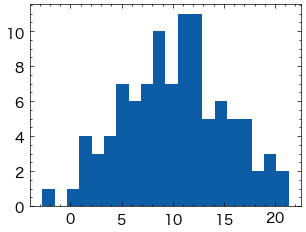

In [24]:
fig, ax = plt.subplots()
ax.hist(x, bins=20)
plt.show()

- 棒の太さは`rwidth`オプションで指定できます。0から1の範囲を取り、値が小さいほど細くなります。
- 棒の色は`color`オプションで指定できます。`color`オプションの詳細は以下の記事を参考にして下さい。
- `alpha`オプションで透明度を変更できます。`0`から`1`の範囲を取り、値が小さいほど透明に近づきます。


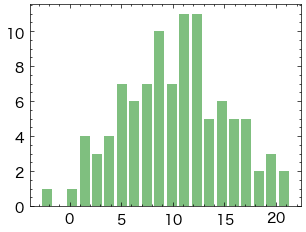

In [25]:
fig, ax = plt.subplots()
ax.hist(x, bins=20, rwidth=0.8, color="green", alpha=0.5)
plt.show()

複数系列のデータからヒストグラムを作成するする方法を示します。

まず、単純に棒を横に並べる例です。`ax.hist`に複数のデータをリストで渡します。

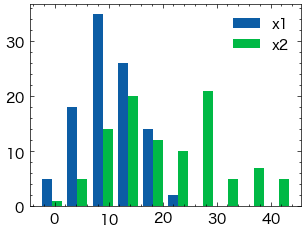

In [26]:
np.random.seed(seed=0)
x1 = np.random.normal(10, 5, 100) # 平均10, 標準偏差5の正規分布で100点のデータを生成
x2 = np.random.normal(20, 10, 100) # 平均20, 標準偏差10の正規分布で100点のデータを生成

fig, ax = plt.subplots()
ax.hist([x1, x2])
ax.legend(["x1", "x2"])
plt.show()

`alpha`オプションを使って棒を透過させ、重ねて表示することも可能です。

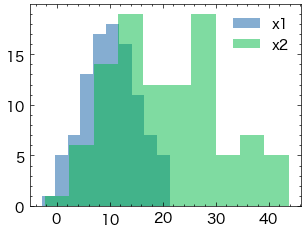

In [27]:
fig, ax = plt.subplots()
ax.hist(x1, alpha=0.5, label="x1")
ax.hist(x2, alpha=0.5, label="x2")
ax.legend()
plt.show()

ヒストグラムを積み上げる場合、`histtype="barstacked"`とするか、`stacked=True`とします。

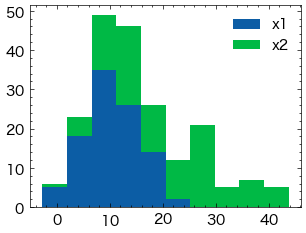

In [28]:
fig, ax = plt.subplots()
ax.hist([x1, x2], histtype="barstacked")
# ax.hist([x1, x2], stacked=True) # これも同じ結果になる
ax.legend(["x1", "x2"])
plt.show()

#### 箱ひげ図

箱ひげ図をプロットするには、`ax.boxplot`を使用します。`ax.boxplot`に渡すデータ（以下の例では`x`）が1次元配列の場合、箱ひげ図は1個だけ出力されます。一方、データが2次元配列の場合、箱ひげ図は列の数だけ出力されます。

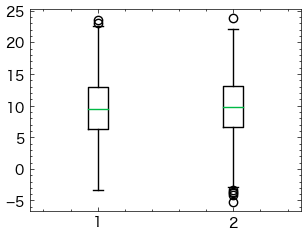

In [29]:
np.random.seed(seed=0)
x = np.random.normal(10, 5, 1000).reshape(-1,2)
# 平均10, 標準偏差5の正規分布。500行2列の配列データを生成

fig, ax = plt.subplots()
ax.boxplot(x)
plt.show()

boxplotで指定できる主なオプションを以下に示します。

- `sym` (str): 外れ値記号の見た目
- `flierprops` (dict): 外れ値記号の見た目
- `vert` (bool): `True`の場合、箱ひげ図は横向きになる（デフォルト：`False`）
- `whis` (float/(float, float)): ひげの開始位置（デフォルト：`1.5`）
- `widths` (float): 箱の幅
- `labels` (sequence): データのラベル（横軸に表示）
- `showmeans` (bool): `True`の場合、平均値を表示する（デフォルト：`False`）

`widths`オプションで箱の幅を指定できます（デフォルトは`0.5`、またはグラフの幅から自動的に決定されます）。

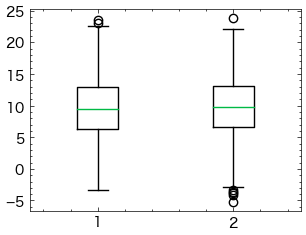

In [30]:
fig, ax = plt.subplots()
ax.boxplot(x, widths=0.3)
plt.show()

`labels`オプションでデータのラベルを指定できます。

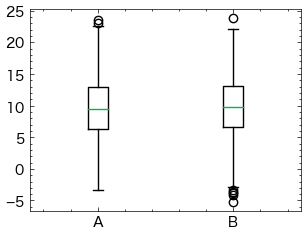

In [31]:
fig, ax = plt.subplots()
ax.boxplot(x, labels=["A", "B"])
plt.show()

平均値を表示するには`showmeans=True`とします。平均値マーカーの表示方法は、`meanprops`オプションに辞書形式で指定できます。

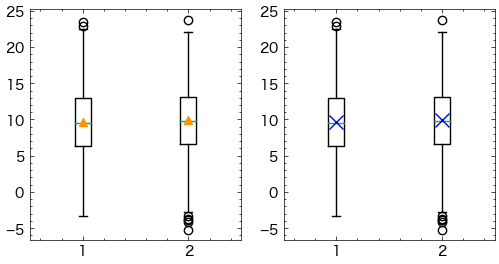

In [32]:
fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].boxplot(x, showmeans=True)
ax[1].boxplot(x, showmeans=True, meanprops={"marker":"x", "markeredgecolor":"blue", "ms":10})
plt.show()

#### 散布図

散布図を出力するには、`ax.scatter`を使用します。`ax.scatter`の最初の引数に横軸方向の値、2番目の引数に縦軸方向の値をそれぞれ配列で与えます。

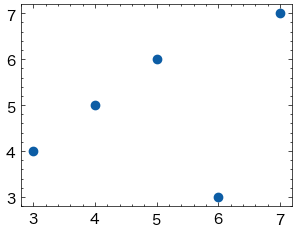

In [33]:
import numpy as np

x = np.array([4, 6, 7, 3, 5]) # 横軸の値
y = np.array([5, 3, 7, 4, 6]) # 縦軸の値

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

散布図に系列を追加したい場合、以下のように`ax.plot`を追加します。`label`オプションと`ax.legend()`を使うことで、系列名を凡例として表示できます。

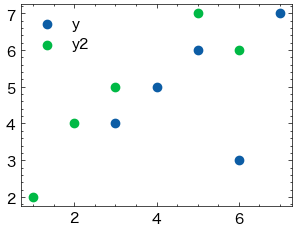

In [34]:
x2 = np.array([1, 3, 2, 5, 6]) # 横軸の値
y2 = np.array([2, 5, 4, 7, 6]) # 縦軸の値

fig, ax = plt.subplots()
ax.scatter(x, y, label="y")
ax.scatter(x2, y2, label="y2")
ax.legend()
plt.show()

マーカーの大きさ・色・種類を変更することができます
- マーカーの大きさは`s`オプションで指定します。
- マーカーの色は`c`オプションで指定します。
- `alpha`オプションで透明度を変更できます。`0`から`1`の範囲を取り、値が小さいほど透明に近づきます。
- マーカーの種類は`marker`オプションで指定します。

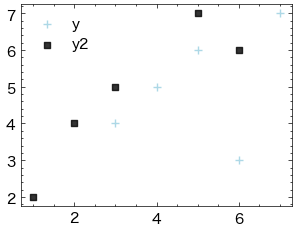

In [35]:
x2 = np.array([1, 3, 2, 5, 6]) # 横軸の値
y2 = np.array([2, 5, 4, 7, 6]) # 縦軸の値

fig, ax = plt.subplots()
ax.scatter(x, y, label="y", c="lightblue",s=35,marker="+")
ax.scatter(x2, y2, label="y2",c="black",s=20,alpha=0.8,marker="s")
ax.legend()
plt.show()

散布図の各点の色を、値に合わせて指定できます。`c`に値を、`cmap`にカラーマップを指定します。

指定可能なカラーマップについては、以下のページも参照下さい。

[Matplotlibのカラーマップ](../matplotlib-conf/colormap)

カラーバーを表示する場合、`plt.colorbar`を使用します。`ax.scatter`の戻り値は`PathCollection`というクラスのオブジェクトです。これを`plt.colorbar`の最初の引数とします。また、`ax`オプションにカラーバーを表示するグラフ（ここでは`ax`）を指定します。

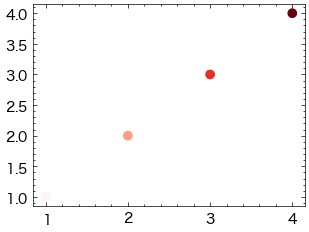

In [36]:
x1 = np.array([1, 2, 3, 4]) # 横軸の値
y1 = np.array([1, 2, 3, 4]) # 縦軸の値
v1 = np.array([1, 2, 3, 4]) # 点の色に対応する値

fig, ax = plt.subplots()
ax.scatter(x1, y1, c=v1, cmap="Reds")
plt.show()

また、表示するカラーマップの範囲を固定したい場合、最小値と最大値をそれぞれ`vmin`, `vmax`で指定します。

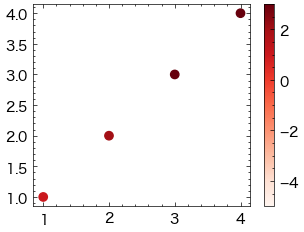

In [37]:
fig, ax = plt.subplots()
mappable = ax.scatter(x1, y1, c=v1, cmap="Reds", vmin=-5, vmax=3)
plt.colorbar(mappable, ax=ax)
plt.show()

### プロットの制御

#### タイトル・軸ラベルの表示

グラフタイトル、x軸のラベル、y軸のラベルを表示と調整することができます。

- `fontsize`: タイトル(軸ラベル)のフォントサイズを指定します。
- `loc`: タイトルの位置を指定します。'left', 'center', 'right'のいずれかを選択できます。
- `pad`: タイトルとプロットの間のパディングを指定します。
- `labelpad`: 軸ラベルと軸の間のパディングを指定します。


Text(0, 0.5, '人口数')

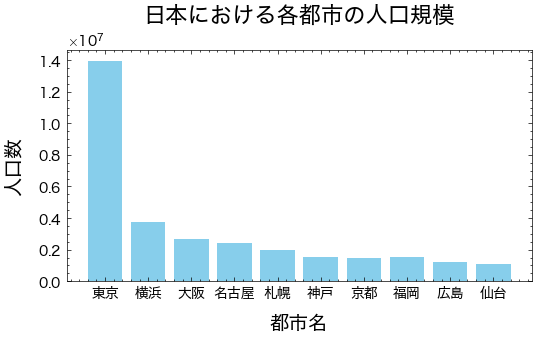

In [38]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.8)
ax.set_title("日本における各都市の人口規模",fontsize=16, loc='center',pad=20)
ax.set_xlabel('都市名', fontsize=14,labelpad=10)
ax.set_ylabel('人口数', fontsize=14,labelpad=10)

#### 軸の目盛

x軸とy軸には、プロットする値に応じて自動的に目盛ラベルが表示されますが、さらにカスタマイズすることもできます。

- x軸
    - `set_xticks`メソッドでx軸の目盛り位置を設定します。range(len(city))は都市の数に基づいて目盛り位置を設定しています。
    - `set_xticklabels`メソッドで目盛りラベルを設定し、45度回転させています。
- y軸
    - `set_yticks`メソッドでy軸の目盛り位置を設定します

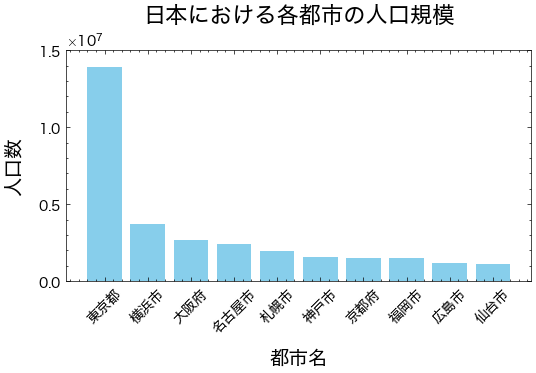

In [39]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.8)
ax.set_title("日本における各都市の人口規模",fontsize=16, loc='center',pad=20)
ax.set_xlabel('都市名', fontsize=14,labelpad=10)
ax.set_ylabel('人口数', fontsize=14,labelpad=10)
# x軸の目盛りラベルを設定
ax.set_xticks(range(len(city)))
ax.set_xticklabels(['東京都', '横浜市', '大阪府', '名古屋市', '札幌市', '神戸市', '京都府', '福岡市', '広島市', '仙台市'], rotation=45)
# y軸の目盛りを調整
ax.set_yticks([0, 5000000, 10000000, 15000000])


目盛りのさらに詳細な設定をするには、`Axes.tick_params()`メソッドを用います。このメソッドの主なオプションを以下に示します。

|オプション|型|説明|
|---|---|---|
|axis|str|軸を選択('both', 'x', 'y')|
|which|str|目盛り線の種類を指定。'major'（主目盛り）、'minor'（補助目盛り）、'both'（両方の目盛り）|
|direction|str|目盛りの位置。'in', 'out', 'inout'|
|length|float|目盛りの長さ|
|width|float|目盛りの幅|
|color|str|目盛りの色|
|pad|float|目盛りと目盛りラベルの隙間|
|labelsize|float|目盛りラベルの大きさ|
|labelcolor|str|目盛りラベルの色|
|colors|str|目盛りと目盛りラベルの色|
|zorder|float|描画する順序|
|labelrotation|float|目盛りラベルの回転角度（半時計回りに回転。単位は度）|

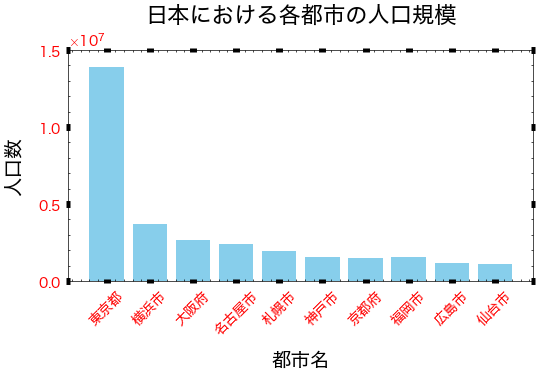

In [40]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.8)
ax.set_title("日本における各都市の人口規模",fontsize=16, loc='center',pad=20)
ax.set_xlabel('都市名', fontsize=14,labelpad=10)
ax.set_ylabel('人口数', fontsize=14,labelpad=10)
# x軸の目盛りラベルを設定
ax.set_xticks(range(len(city)))
ax.set_xticklabels(['東京都', '横浜市', '大阪府', '名古屋市', '札幌市', '神戸市', '京都府', '福岡市', '広島市', '仙台市'], rotation=45)
# y軸の目盛りを調整
ax.set_yticks([0, 5000000, 10000000, 15000000])
ax.tick_params(labelcolor="red", width=5, direction='inout')


目盛り線を引くには、Axes.grid()メソッドを用います。

- `axis`: 軸を選択('both', 'x', 'y')
- `which`: 目盛り線の種類を指定。'major'（主目盛り）、'minor'（補助目盛り）、'both'（両方の目盛り）
- `linewidth`
- `color`
- `linestyle`



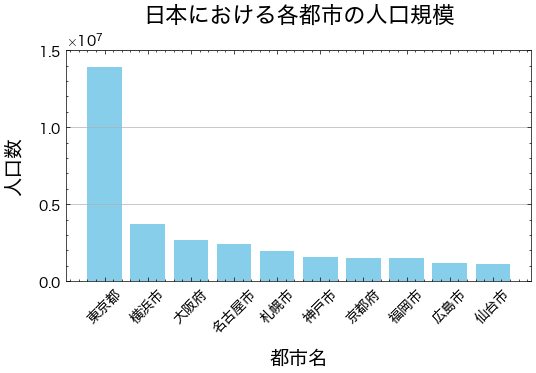

In [41]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population,color='skyblue', width=0.8)
ax.set_title("日本における各都市の人口規模",fontsize=16, loc='center',pad=20)
ax.set_xlabel('都市名', fontsize=14,labelpad=10)
ax.set_ylabel('人口数', fontsize=14,labelpad=10)
# x軸の目盛りラベルを設定
ax.set_xticks(range(len(city)))
ax.set_xticklabels(['東京都', '横浜市', '大阪府', '名古屋市', '札幌市', '神戸市', '京都府', '福岡市', '広島市', '仙台市'], rotation=45)
# y軸の目盛りを調整
ax.set_yticks([0, 5000000, 10000000, 15000000])
#目盛り線を引く
ax.grid(axis="y")


#### グラフに文字をつける

グラフにテキストやマークをつけることで、関連する追加情報を提供することができます。

文字をつけるには、`ax.text`メソッドを使用します。このメソッドには、注釈をつけるテキスト、位置、およびその他のスタイルオプションを指定できます。

基本的には、`ax.text(x, y, s)`は文字列を描画することができます。ここで、`x`と`y`は文字列の左下のx, y座標であり、`s`は表示する文字列です。

フォントに関する主な書式を以下の表に示します。

|引数|説明|
|---|---|
|fontfamily/family|'serif', 'sans-serif', 'cursive'（筆記体）, 'fantasy'（装飾の多いフォント）, 'monospace'（等幅フォント）|
|fontsize/size|floatの数値、または'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'|
|fontstyle/style|'normal', 'italic'（斜体）, 'oblique'（斜体）|
|fontstretch/stretch|文字の横幅。0～1000の範囲の数値、または 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'|
|fontweight/weight|文字の太さ。0～1000の範囲の数値、または'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'|
|color/c|文字の色|

また、文字の配置に関する主な書式を以下の表に示します。

|引数|説明|
|---|---|
|horizontalalignment/ha|横方向の位置。'left', 'center', 'right'|
|verticalalignment/va|縦方向の位置。'bottom', 'baseline', 'center', 'center_baseline', 'top'|
|multialignment or ma|複数行の位置。'left', 'right', 'center'|
|linespacing|行間の広さをフォントサイズの倍数で指定|
|rotation|文字の回転。角度(°)または、'vertical'（`90`）, 'horizontal'(`0`)|

##### フォントファミリー

フォントファミリー（フォントの種類）は`fontfamily`または`family`オプションで変更できます。'serif', 'sans-serif', 'cursive'（筆記体）, 'fantasy'（装飾の多いフォント）, 'monospace'（等幅フォント）から選択可能です。以下に例を示します。

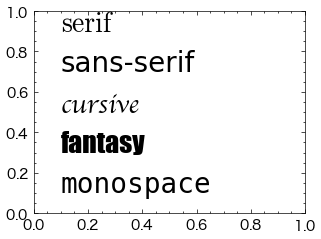

In [42]:
fig, ax = plt.subplots()
ax.text(0.1, 0.9, "serif", fontfamily="serif", fontsize=20)
ax.text(0.1, 0.7, "sans-serif", fontfamily="sans-serif", fontsize=20)
ax.text(0.1, 0.5, "cursive", fontfamily="cursive", fontsize=20)
ax.text(0.1, 0.3, "fantasy", fontfamily="fantasy", fontsize=20)
ax.text(0.1, 0.1, "monospace", fontfamily="monospace", fontsize=20)
plt.show()

##### 文字の太さ

文字列の太さは`fontweight`または`weight`オプションで変更できます。0～1000の範囲の数値で指定、または'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'から選択します。以下に例を示します。

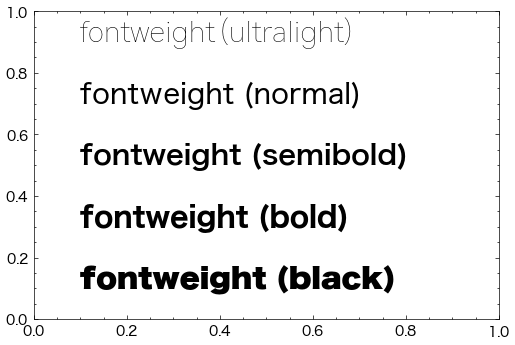

In [43]:
fig, ax = plt.subplots(figsize=(6,4))
ax.text(0.1, 0.9, "fontweight (ultralight)", fontweight="ultralight", fontsize=20)
ax.text(0.1, 0.7, "fontweight (normal)", fontweight="normal", fontsize=20)
ax.text(0.1, 0.5, "fontweight (semibold)", fontweight="semibold", fontsize=20)
ax.text(0.1, 0.3, "fontweight (bold)", fontweight="bold", fontsize=20)
ax.text(0.1, 0.1, "fontweight (black)", fontweight="black", fontsize=20)
plt.show()

##### 横方向の位置

テキストの横方向の位置は、`horizontalalignment`または`ha`オプションに`'left'`, `'center'`, `'right'`のいずれかを与えて指定します。
`ax.text(x, y, s)`の最初の引数`x`で文字列の横方向の位置を指定しますが、

- `'left'`: `x`が文字列の左端の座標になる（デフォルト）
- `'center'`: `x`が文字列の中央の座標になる
- `'right'`: `x`が文字列の右端の座標になる

となります。

以下に`x=0.5`としたときの例を示します。

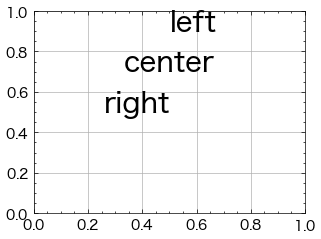

In [44]:
fig, ax = plt.subplots()
ax.text(0.5, 0.9, "left", horizontalalignment="left", fontsize=20)
ax.text(0.5, 0.7, "center", horizontalalignment="center", fontsize=20)
ax.text(0.5, 0.5, "right", horizontalalignment="right", fontsize=20)
ax.grid()
plt.show()

##### 行間の広さ

テキストの行間の広さは`linespacing`オプションで指定します。以下にデフォルトの行間と`linespacing`を1, 1.5とした例をそれぞれ示します（デフォルトの値は1.2です）。
また、`"\n"`は改行を意味します。

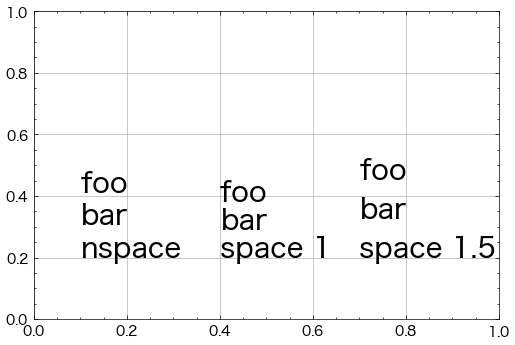

In [45]:
fig, ax = plt.subplots(figsize=(6,4))
ax.text(0.1, 0.2, "foo\nbar\nnspace", fontsize=20) # デフォルトの行間
ax.text(0.4, 0.2, "foo\nbar\nspace 1", linespacing=1, fontsize=20)
ax.text(0.7, 0.2, "foo\nbar\nspace 1.5", linespacing=1.5, fontsize=20)
ax.grid()
plt.show()

Text(6.5, 12000000, '2019年時点のデータ\nになります')

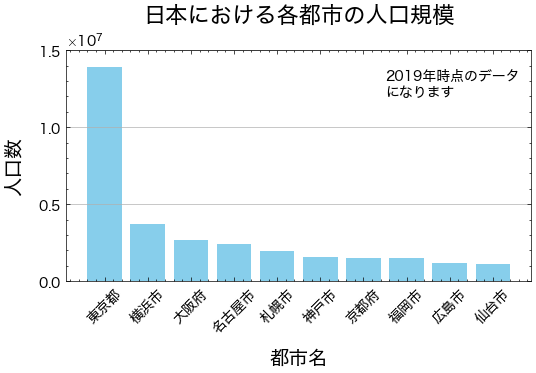

In [46]:
city=['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population= [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
fig, ax = plt.subplots(figsize=(6, 3))
bars = ax.bar(city, population,color='skyblue', width=0.8)
ax.set_title("日本における各都市の人口規模",fontsize=16, loc='center',pad=20)
ax.set_xlabel('都市名', fontsize=14,labelpad=10)
ax.set_ylabel('人口数', fontsize=14,labelpad=10)
# x軸の目盛りラベルを設定
ax.set_xticks(range(len(city)))
ax.set_xticklabels(['東京都', '横浜市', '大阪府', '名古屋市', '札幌市', '神戸市', '京都府', '福岡市', '広島市', '仙台市'], rotation=45)
# y軸の目盛りを調整
ax.set_yticks([0, 5000000, 10000000, 15000000])
#目盛り線を引く
ax.grid(axis="y")

ax.text(6.5, 12000000, s="2019年時点のデータ\nになります",fontsize=10,horizontalalignment="left")


#### 凡例の設定

プロットの凡例は、様々なプロット要素にラベルを割り当て、可視化の結果をわかりやすくします。

###### 凡例の表示

凡例を表示する方法はいくつかあります。

1つ目は、データをプロットする際に`label`引数でラベルを設定し、`legend()`メソッドで凡例を表示する方法です。

2つ目は、`legend()`メソッドにラベルを与える方法です。ラベルはリストで与えます。

それぞれの例を以下に示します。どちらも同じ結果となります。

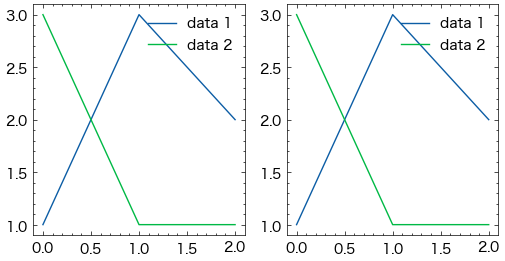

In [47]:
# label引数でラベルを設定する
fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot([1, 3, 2], label="data 1")
ax[0].plot([3, 1, 1], label="data 2")
ax[0].legend()

ax[1].plot([1, 3, 2])
ax[1].plot([3, 1, 1])
ax[1].legend(["data 1", "data 2"])
plt.show()

##### 凡例の位置

凡例の位置は`legend()`メソッドの`loc`オプションで指定できます。デフォルト値は`best`（プロットと凡例がなるべく重ならないように配置する）です。また、以下からも指定可能です。

```
---------------------------------------
|upper left |upper center|upper right |
---------------------------------------
|center left|center      |center right|
---------------------------------------
|lower left |lower center|lower right |
---------------------------------------
```

凡例の位置を左側中段 (`center left`) とした例を以下に示します。

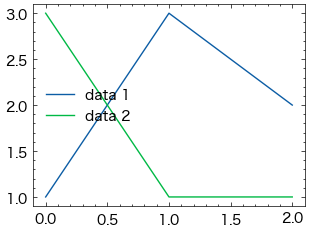

In [48]:
fig, ax = plt.subplots()
ax.plot([1, 3, 2], label="data 1")
ax.plot([3, 1, 1], label="data 2")
ax.legend(loc="center left")
plt.show()

また、凡例の位置は`bbox_to_anchor`オプションでも指定可能です。このオプションに座標を(x, y)で渡します。グラフの左下が(0, 0), 右上が(1, 1)となります。`bbox_to_anchor`にそれぞれ(0, 0)と(1, 1)を指定した例を以下に示します。

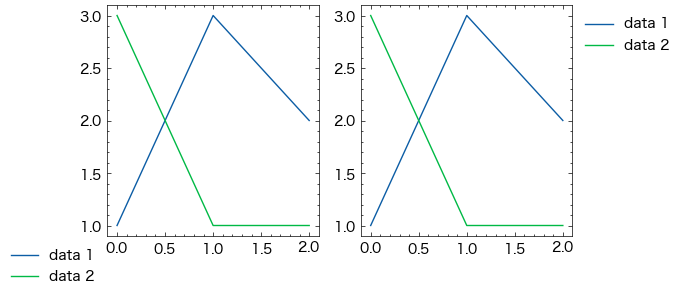

In [49]:
fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot([1, 3, 2], label="data 1")
ax[0].plot([3, 1, 1], label="data 2")
ax[0].legend(bbox_to_anchor=(0, 0))

ax[1].plot([1, 3, 2], label="data 1")
ax[1].plot([3, 1, 1], label="data 2")
ax[1].legend(bbox_to_anchor=(1, 1))


##### 凡例の列数

凡例の列数は`legend()`メソッドの`ncol`オプションで指定できます。以下は列数を2とした例です。

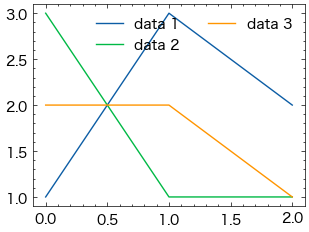

In [50]:
fig, ax = plt.subplots()
ax.plot([1, 3, 2], label="data 1")
ax.plot([3, 1, 1], label="data 2")
ax.plot([2, 2, 1], label="data 3")
ax.legend(ncol=2)
plt.show()

##### 凡例の色

凡例の文字色は`legend()`メソッドの`labelcolor`, 背景色は`facecolor`, 枠線の色は`edgecolor`でそれぞれ指定できます。また、背景色の透過度は`framealpha`で指定できます（0～1の範囲で指定し、値が小さいほど透明に近づきます）。

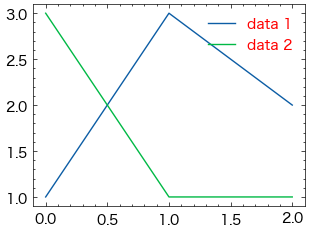

In [51]:
fig, ax = plt.subplots()
ax.plot([1, 3, 2], label="data 1")
ax.plot([3, 1, 1], label="data 2")
ax.legend(labelcolor="red", facecolor="blue", edgecolor="orange", framealpha=0.2)

##### 凡例の文字サイズ

凡例の文字サイズは`legend()`メソッドの`fontsize`オプションで指定できます。整数または次のいずれかから指定可能です。
`{"xx-small", "x-small", "small". "medium", "large", "x-large", "xx-large"}`

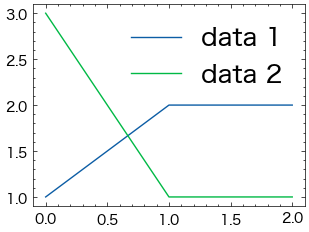

In [52]:
fig, ax = plt.subplots()
ax.plot([1, 2, 2], label="data 1")
ax.plot([3, 1, 1], label="data 2")
ax.legend(fontsize=18)


##### 凡例のタイトル

凡例にタイトルを設定する場合、`legend()`メソッドの`title`オプションで指定できます。以下はタイトルを"Prices"と設定した例です。

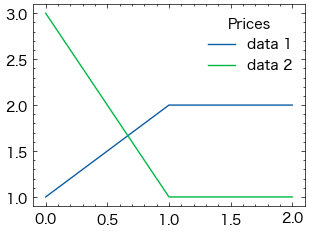

In [53]:
fig, ax = plt.subplots()
ax.plot([1, 2, 2], label="data 1")
ax.plot([3, 1, 1], label="data 2")
ax.legend(title="Prices")

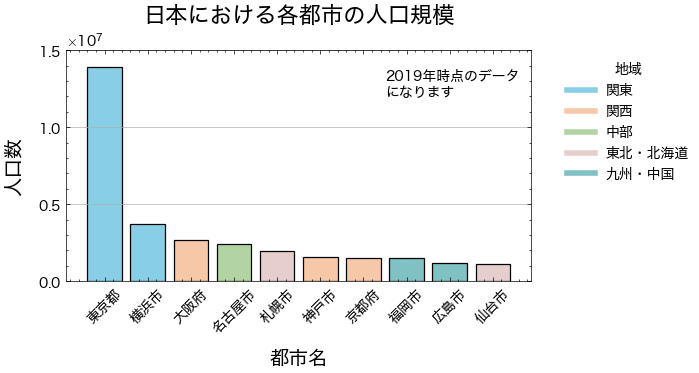

In [54]:
# Define the data
city = ['東京', '横浜', '大阪', '名古屋', '札幌', '神戸', '京都', '福岡', '広島', '仙台']
population = [13929286, 3723392, 2691004, 2390411, 1952356, 1538316, 1474570, 1532591, 1196564, 1098330]
regions = ["関東", "関東", "関西", "中部", "東北・北海道", "関西", "関西", "九州・中国", "九州・中国", "東北・北海道"]

# Define the colors for each region
region_colors = {
    "関東": "#88CEE6",
    "関西": "#F6C8A8",
    "中部": "#B2D3A4",
    "東北・北海道": "#E6CECF",
    "九州・中国": "#80C1C4"
}

fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(city, population, color=[region_colors[region] for region in regions],label=regions,edgecolor="black", linewidth=.9)

ax.set_title("日本における各都市の人口規模", fontsize=16, loc='center', pad=20)
ax.set_xlabel('都市名', fontsize=14, labelpad=10)
ax.set_ylabel('人口数', fontsize=14, labelpad=10)

ax.set_xticks(range(len(city)))
ax.set_xticklabels(['東京都', '横浜市', '大阪府', '名古屋市', '札幌市', '神戸市', '京都府', '福岡市', '広島市', '仙台市'], rotation=45)

ax.set_yticks([0, 5000000, 10000000, 15000000])
ax.grid(axis="y")

ax.text(6.5, 12000000, s="2019年時点のデータ\nになります", fontsize=10, horizontalalignment="left")

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in region_colors.values()]
labels = region_colors.keys()
ax.legend(handles, labels, title="地域", bbox_to_anchor=(1.05, 1), loc='upper left')

### グラフの保存

グラフを保存する場合、`fig.savefig()`メソッドを使用します。

保存する画像の形式は、ファイル名の拡張子から自動的に判断されます。`.png`以外には.`jpg`, `.pdf`, `.svg`が指定可能です。

`fig.savefig()`のメソッドの主なオプションを以下に示します。

|オプション|型|説明|
|---|---|---|
|dpi|float|解像度 (dots per inch)|
|facecolor|str|背景の塗り潰し色|
|edgecolor|srt|枠線の色|
|transparent|boot|`True`の場合、背景が透明になる|





In [55]:
#fig.savefig("./Figure/graph.png")

````{tab-set}
```{tab-item} 実習問題
以下の図を再現してください
```
````

In [56]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

![](./Figure/age_hist.png)

![](./Figure/age_sex_hist.png)